In [ ]:
import numpy as np
import tensorflow as tf
import matplotlib
from matplotlib import pyplot as plt
import PIL
import random
from PIL import Image
print("LIBERARIES IMPORTED SUCCESSFULLY")

LIBERARIES IMPORTED SUCCESSFULLY


In [ ]:
# image = Image.open('frame.jpg')
# image = image.resize((32,32))
# image.save('new_image.jpg')
# image

In [ ]:
cifar = tf.keras.datasets.cifar10
(trainImage, trainLabel), (testImage, testLabel) = cifar.load_data()

170498071/170498071 [==============================] - 5s 0us/step


/usr/local/lib/python3.8/dist-packages/matplotlib/text.py:1165: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:


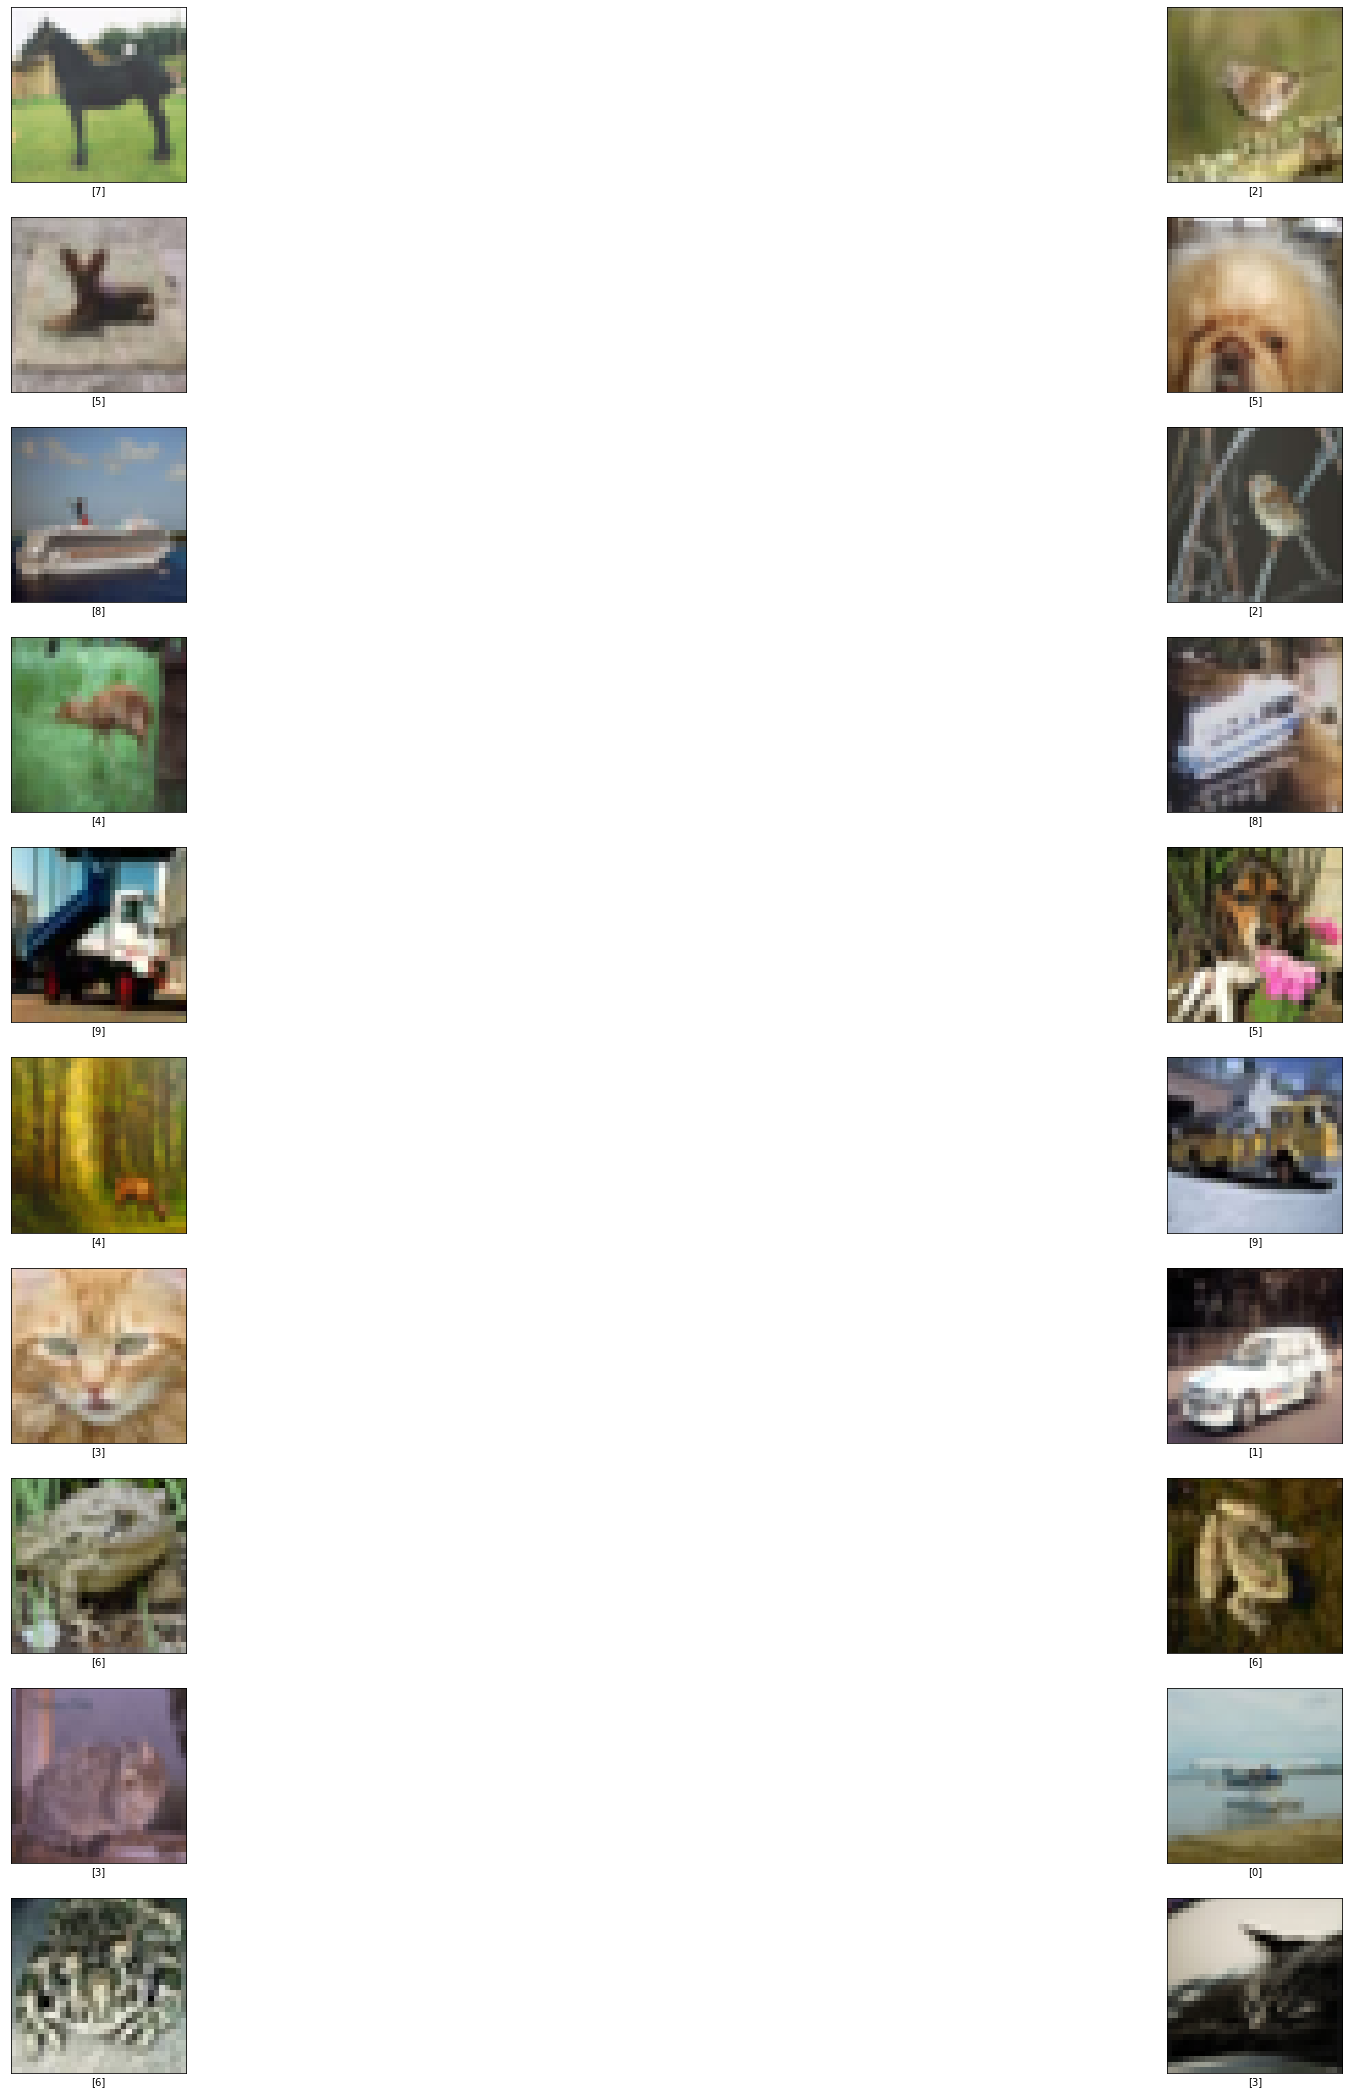

In [ ]:
randIdx = np.random.choice(10000, 20)
plt.figure(figsize=(38,38))
for i in range(20):
  plt.subplot(10, 2, i+1)
  plt.xticks([])
  plt.yticks([])
  plt.grid(False)
  preview = plt.imshow(testImage[randIdx[i]])
  plt.xlabel(testLabel[randIdx[i]])

In [ ]:
# OK it works


In [ ]:
trainImage_t = (trainImage/255).astype(np.float32)
trainLabel_t = trainLabel.astype(np.int64)
testImage_t  = (testImage/255).astype(np.float32)
testLabel_t = testLabel.astype(np.int64)
testImage.shape

(10000, 32, 32, 3)

In [ ]:
def cnnModelBuild():
  cnnModel = tf.keras.Sequential([
      tf.keras.layers.Input(shape =(32, 32, 3)),
      tf.keras.layers.Conv2D(filters= 10, kernel_size = (3, 3), activation= tf.nn.relu),
      tf.keras.layers.MaxPool2D(pool_size=(2, 2)),
      tf.keras.layers.Conv2D(filters = 20, kernel_size = (5, 5), strides=(2, 2), activation = tf.nn.relu),
      tf.keras.layers.Conv2D(filters = 40, kernel_size = 3, padding = "same", activation = tf.nn.relu ),
      tf.keras.layers.Flatten(),
      tf.keras.layers.Dense(128, activation = tf.nn.relu),
      tf.keras.layers.Dense(10, activation = tf.nn.softmax)
  ])
  return cnnModel
model = cnnModelBuild()

In [ ]:
model.compile(optimizer = 'SGD', loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'] )

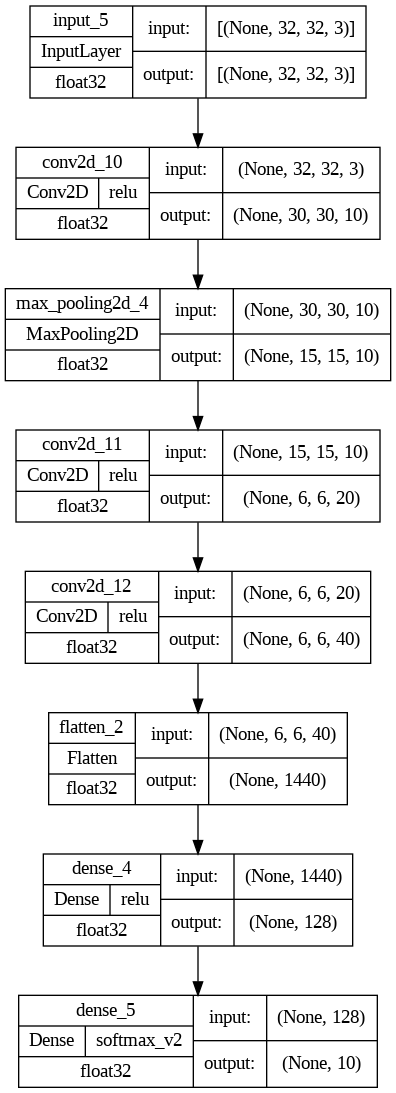

In [ ]:
tf.keras.utils.plot_model(model, show_shapes = True, show_dtype = True, show_layer_activations=True)

In [ ]:
model.fit(trainImage_t, trainLabel_t, batch_size= 64, epochs = 25, validation_data= (testImage_t, testLabel_t))

Epoch 1/25
782/782 [==============================] - 12s 5ms/step - loss: 2.1208 - accuracy: 0.2256 - val_loss: 1.9337 - val_accuracy: 0.3033
Epoch 2/25
782/782 [==============================] - 4s 5ms/step - loss: 1.8603 - accuracy: 0.3331 - val_loss: 1.7815 - val_accuracy: 0.3578
Epoch 3/25
782/782 [==============================] - 4s 5ms/step - loss: 1.7237 - accuracy: 0.3880 - val_loss: 1.6494 - val_accuracy: 0.4210
Epoch 4/25
782/782 [==============================] - 4s 4ms/step - loss: 1.6014 - accuracy: 0.4287 - val_loss: 1.7141 - val_accuracy: 0.3753
Epoch 5/25
782/782 [==============================] - 4s 5ms/step - loss: 1.5176 - accuracy: 0.4588 - val_loss: 1.5705 - val_accuracy: 0.4280
Epoch 6/25
782/782 [==============================] - 4s 4ms/step - loss: 1.4483 - accuracy: 0.4850 - val_loss: 1.6150 - val_accuracy: 0.4370
Epoch 7/25
782/782 [==============================] - 3s 4ms/step - loss: 1.3947 - accuracy: 0.5025 - val_loss: 1.4784 - val_accuracy: 0.4754
Epoch